### Predicting Admissions Problem
- Predict Chance of admit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data
data = pd.read_csv('admission_predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


### Data distribution

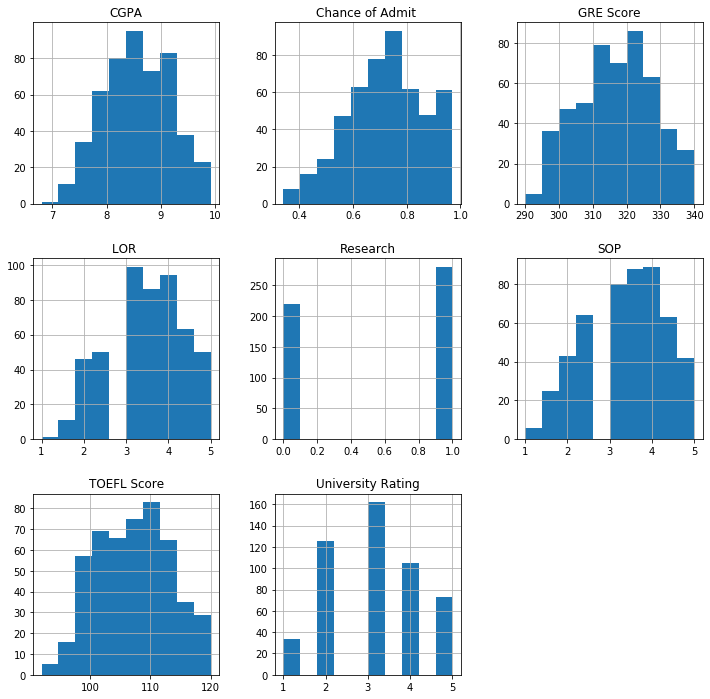

In [6]:
# exclude serial number
data.iloc[:, 1:].hist(figsize= (12,12))
plt.show()

In [7]:
data['Research'].unique()

array([1, 0], dtype=int64)

In [8]:
data['University Rating'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [9]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
data['SOP'].unique()

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

In [11]:
data['LOR '].unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

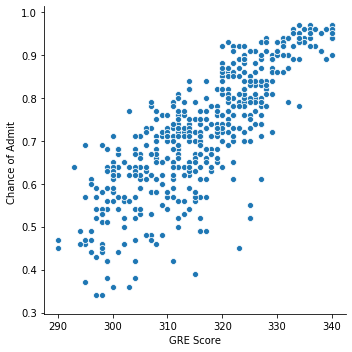

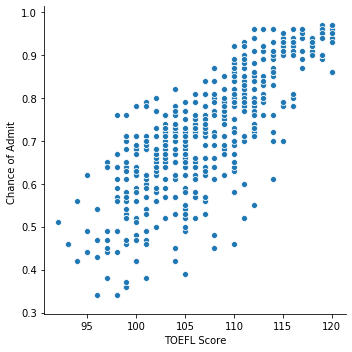

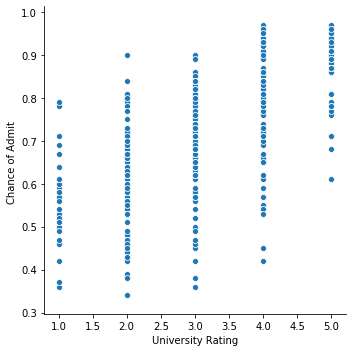

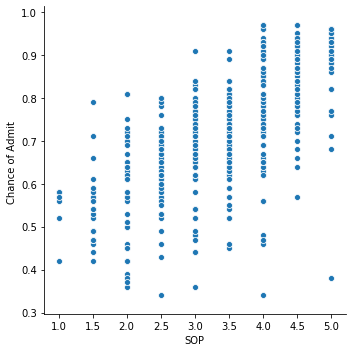

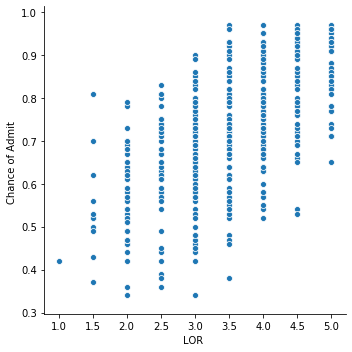

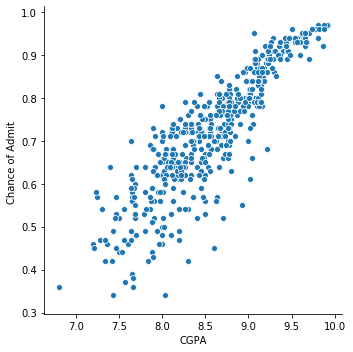

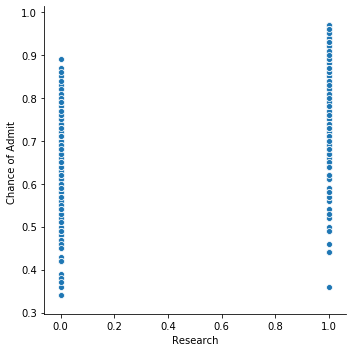

In [12]:
a = list(data.columns)[:-1]
b = a[1:]
b

for i in b:
    sns.relplot(x = i, y = 'Chance of Admit ', data = data)

- All most input attributes fits in a linear fashion so we can go for **linear regression** but lets check with other models as well

In [13]:
data = pd.get_dummies(data, columns= ['University Rating'])
data.head()

,Serial No.,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit,University Rating_1,University Rating_2,University Rating_3,University Rating_4,University Rating_5
0,1,337,118,4.5,4.5,9.65,1,0.92,0,0,0,1,0
1,2,324,107,4.0,4.5,8.87,1,0.76,0,0,0,1,0
2,3,316,104,3.0,3.5,8.00,1,0.72,0,0,1,0,0
3,4,322,110,3.5,2.5,8.67,1,0.80,0,0,1,0,0
4,5,314,103,2.0,3.0,8.21,0,0.65,0,1,0,0,0


In [14]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ', 'University Rating_1',
       'University Rating_2', 'University Rating_3', 'University Rating_4',
       'University Rating_5'],
      dtype='object')

In [15]:
data = data.drop(columns= ['University Rating_5', 'Serial No.'])
data.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit,University Rating_1,University Rating_2,University Rating_3,University Rating_4
0,337,118,4.5,4.5,9.65,1,0.92,0,0,0,1
1,324,107,4.0,4.5,8.87,1,0.76,0,0,0,1
2,316,104,3.0,3.5,8.00,1,0.72,0,0,1,0
3,322,110,3.5,2.5,8.67,1,0.80,0,0,1,0
4,314,103,2.0,3.0,8.21,0,0.65,0,1,0,0


### Scaling

In [16]:
X = data.drop(columns= 'Chance of Admit ').values
y = data['Chance of Admit '].values

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

### Train and Test

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Model selection

In [23]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {
                'normalize': [True,False]
            }
        },
        
        'lasso': {
            'model': Lasso(),
            'parameters': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        
        'svr': {
            'model': SVR(),
            'parameters': {
                'gamma': ['auto','scale']
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        
        'random_forest': {
            'model': RandomForestRegressor(criterion='mse'),
            'parameters': {
                'n_estimators': [5,10,15,20]
            }
        },
        
        'knn': {
            'model': KNeighborsRegressor(algorithm='auto'),
            'parameters': {
                'n_neighbors': [2,5,10,20]
            }
        }
    }
    
    scores = []
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=5, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])
        
find_best_model(X_train, y_train)

,model,best_parameters,score
0,linear_regression,{'normalize': True},0.822027
1,lasso,"{'alpha': 1, 'selection': 'random'}",-0.004323
2,svr,{'gamma': 'scale'},0.707430
3,decision_tree,"{'criterion': 'friedman_mse', 'splitter': 'ran...",0.626886
4,random_forest,{'n_estimators': 15},0.772187
5,knn,{'n_neighbors': 10},0.750483


In [24]:
# Using cross_val_score for gaining highest accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(normalize=True), X, y, cv=5)
print('Highest Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Highest Accuracy : 81.0%


In [25]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_pred = linear_reg.predict(X_test)

### Model Evaluation

In [27]:
print('traing score: {}, test score: {}'.format(linear_reg.score(X_train, y_train), linear_reg.score(X_test,y_test)))

traing score: 0.8332135424266612, test score: 0.767456840332593


In [36]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.06372839357618663

### Learning Curves

In [29]:
X_train.shape

(400, 10)

In [30]:
train_sizes = [1, 50, 150, 200, 250, 300, 350, 400]

In [31]:
from sklearn.model_selection import learning_curve

def learning_curves_fun(X,y, model):
    train_sizes = [1, 50, 150, 200, 250, 300, 350, 400]
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator = model,
    X = X,
    y = y, train_sizes = train_sizes, cv = 5,
    scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)
    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
    plt.legend()
    plt.show()

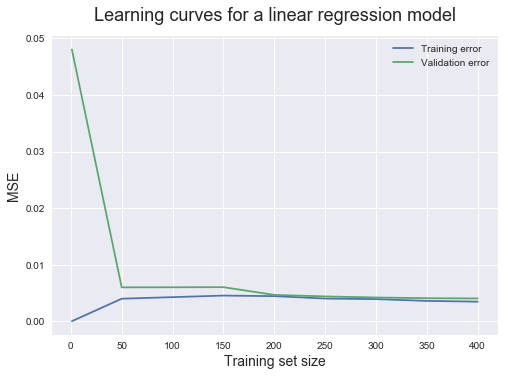

In [32]:
learning_curves_fun(X, y, LinearRegression())